In [30]:
%load_ext autoreload
%autoreload 2

from cnn import CNN
from dyn_cnn import DynCNN
from util import Util
from patch import Patch
from fixer import Fixer
from uglify import Uglify
from uitools import UITools

import os
import mahotas as mh
import numpy as np
import time
import cPickle as pickle

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
cnn = UITools.load_cnn()

Loading ['/home/d/dojo_xp/nets/mine_merged_large_7/configuration.txt']
Loading /home/d/dojo_xp/nets/mine_merged_large_7/network_262.p


In [14]:
input_image, input_prob, input_gold, input_rhoana, dojo_bbox = Util.read_dojo_data() 

In [15]:
#merge_errors = UITools.get_top5_merge_errors(cnn, input_image, input_prob, input_rhoana)
with open('/home/d/dojo_xp/data/merges2.p', 'rb') as f:
    merge_errors = pickle.load(f)

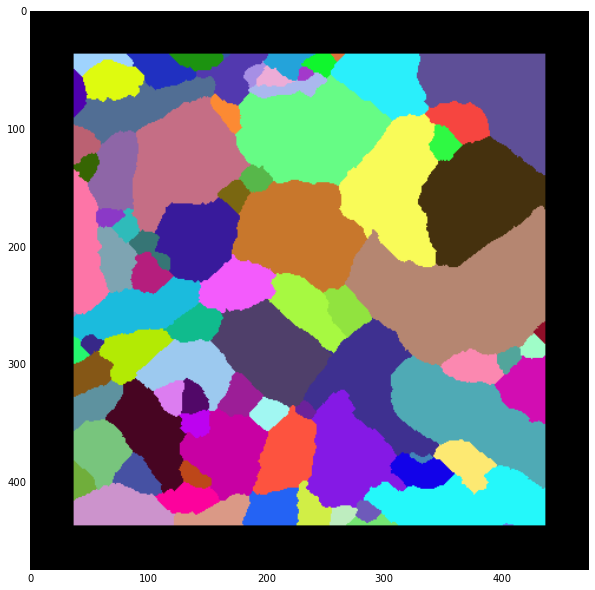

In [16]:
error_no = 0
border_no = 0

z = merge_errors[error_no][0]
label = merge_errors[error_no][1]
border = merge_errors[error_no][3][border_no][1]
# corrected = UITools.correct_merge(input_rhoana[z], label, border)
a,b,c,d,e,f = UITools.get_merge_error_image(input_image[z], input_rhoana[z], label, border)
Util.view(f,large=True,color=True)

In [17]:
with open('/home/d/dojo_xp/data/bigM.p', 'rb') as f:
    bigM = pickle.load(f)

In [39]:
z, labels, prediction = UITools.find_next_split_error(bigM)
a,b,c,d,e = UITools.get_split_error_image(input_image[z], input_rhoana[z], labels)

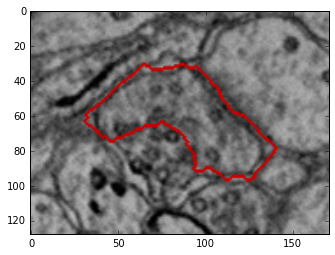

In [41]:
imshow(d)

In [32]:
new_m_z, new_rhoana_z = UITools.correct_split(cnn, bigM[z], input_image[z], input_prob[z], input_rhoana[z], labels[0], labels[1], oversampling=True)

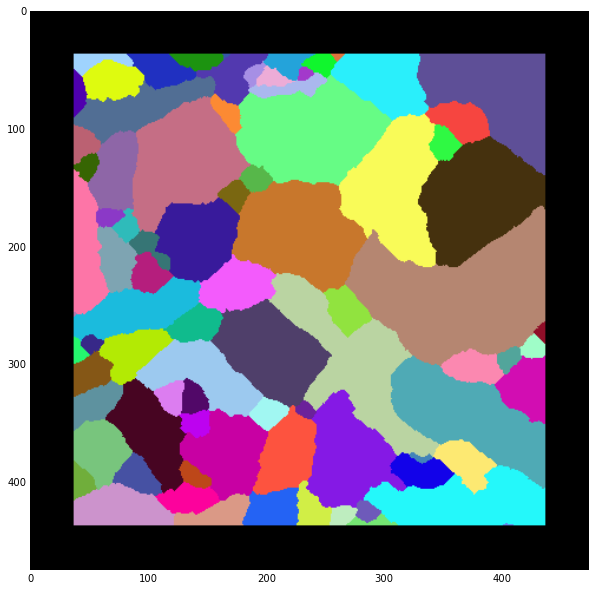

In [37]:
Util.view(new_rhoana_z, large=True)

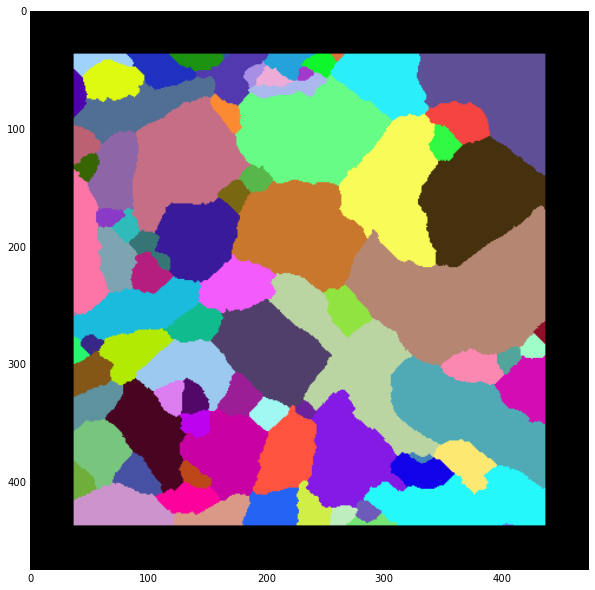

In [38]:
Util.view(input_rhoana[z], large=True)

In [62]:
bigM[z] = new_m_z
input_rhoana[z] = new_rhoana_z

In [84]:
z, labels, prediction = UITools.find_next_split_error(bigM)
a,b,c,d,e = UITools.get_split_error_image(input_image[z], input_rhoana[z], labels)

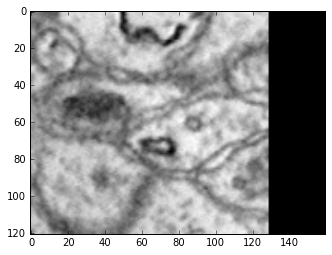

In [81]:
imshow(a, cmap='gray')

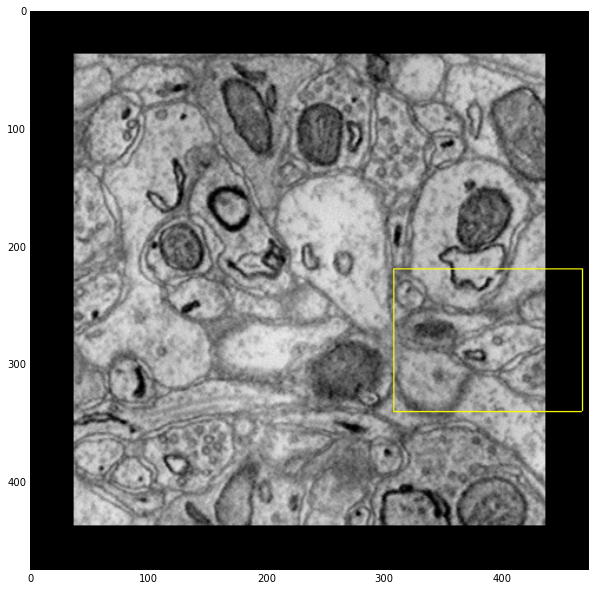

In [85]:
Util.view(e, color=False,large=True)

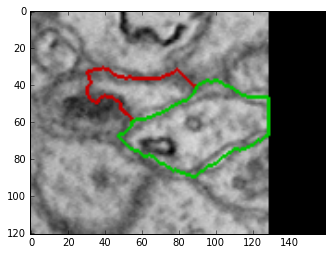

In [66]:
imshow(c)

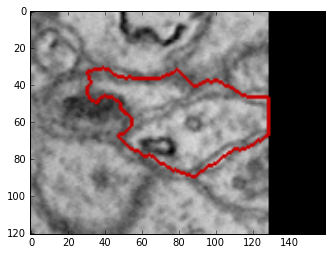

In [67]:
imshow(d)

In [86]:
mh.imsave('/home/d/dojo_xp/tmp/slice_preview.png', e)

In [68]:
prediction

0.99138253927230835

In [46]:
new_m_z, new_rhoana_z = UITools.correct_split(cnn, bigM[z], input_image[z], input_prob[z], input_rhoana[z], labels[0], labels[1], oversampling=True)

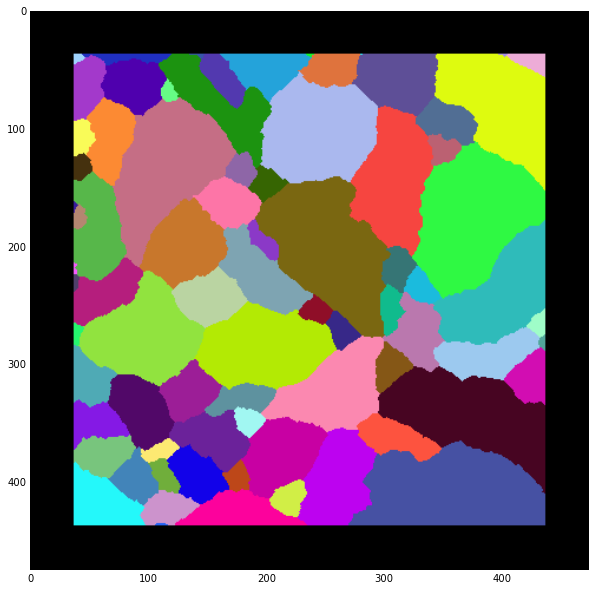

In [47]:
Util.view(new_rhoana_z, large=True)

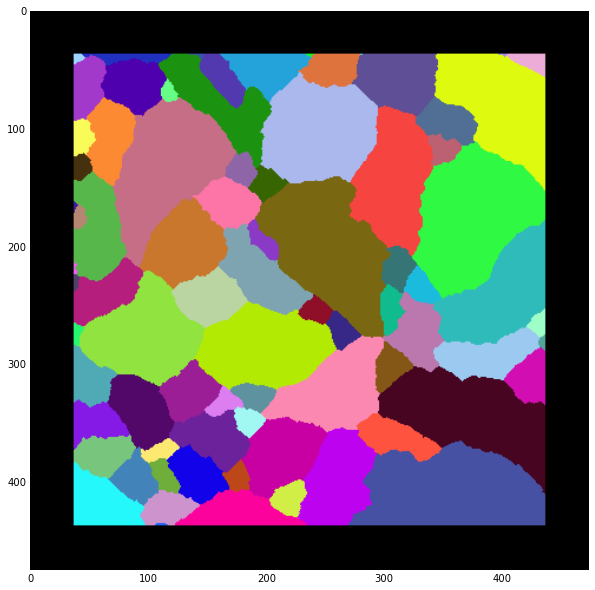

In [48]:
Util.view(input_rhoana[z], large=True)

In [49]:
prediction

0.99321037530899048